# Lab Week 7/8 Full Pipeline Training KNN to Predict `Poisonous` or `Non-Poisonous` in Mushrooms:

In [114]:
import pandas as pd
pd.set_option("display.max_columns", None)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# K-nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier

# Model evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

------

# Question: 
## **Given the secondary_data.csv dataset, can we use this corpus of mushroom data to develop a K-Nearest-Neighbors model that predicts the probability of an unseen mushroom being poisonous.**

------

# Step 1: Clean the Data

In [74]:
data = pd.read_csv("data/MushroomDataset/secondary_data.csv", delimiter=";")

In [75]:
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


In [76]:
data.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [77]:
# drop the columns with excessive nulls, > 20000 feels absurd, others might have a pattern.
potential_pattern_cols = []

for column in data.columns:
    if data[column].isna().sum() >= 20000:
        data.drop(columns=column, inplace=True)
    elif data[column].isna().sum() > 0:
        potential_pattern_cols.append(column)

In [78]:
data.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                2471
habitat                     0
season                      0
dtype: int64

In [79]:
#fill remaining null rows with the letter "U" = "Unknown"
data[potential_pattern_cols] = data[potential_pattern_cols].fillna("U")

In [80]:
data.isna().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [69]:
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,w,16.53,17.20,w,t,p,d,w


# Now to Begin Setting Up One Hot Encoding and Standard Scaling Pipeline for All Features:

In [58]:
categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [86]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Now to Build Model the Model and Train on the Data

In [85]:
y = data["class"]
X = data.drop(columns="class")

categorical_features = X.select_dtypes(include = ["object", "category"]).columns
numerical_features = X.select_dtypes(include = ["int", "float"]).columns

In [87]:
preprocessor.fit(X)
X_transformed = preprocessor.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed,y, train_size=0.8, random_state=42)

In [116]:
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)

# Notable Metrics:

In [113]:
print(f"Recall {recall_score(np.array(y_test), y_pred, pos_label='e')}")
print(f"Precision {precision_score(np.array(y_test), y_pred, pos_label='e')}")
print(f"Accuracy {accuracy_score(np.array(y_test), y_pred)}")

Recall 1.0
Precision 0.9996279761904762
Accuracy 0.9998362534796136


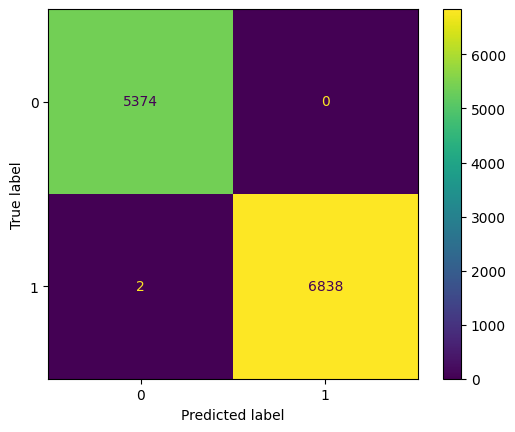

In [117]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()